# Boston House Price Prediction


## About the dataset

- **crim:** Per capita crime rate by town.
- **zn:** Proportion of large residential lots (over 25,000 sq. ft.).
- **indus:** Proportion of non-retail business acres per town.
- **Chas:** Binary variable indicating if the property is near Charles River (1 for yes, 0 for no).
- **nox:** Concentration of nitrogen oxides in the air.
- **rm:** Average number of rooms per dwelling.
- **age:** Proportion of old owner-occupied units built before 1940.
- **dis:** Weighted distances to Boston employment centers.
- **rad:** Index of accessibility to radial highways.
- **tax:** Property tax rate per $10,000.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../Dataset/HousingData.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


## Exploratory Data Analysis


In [3]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [6]:
# for numerical columns Fill with mean or 0 or median

for i in list(df.columns):
    if df[i].dtype != "object" and i != "CHAS":
        df[i].fillna(df[i].mean(), inplace=True)

df.isna().sum()

CRIM        0
ZN          0
INDUS       0
CHAS       20
NOX         0
RM          0
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT       0
MEDV        0
dtype: int64

In [28]:
df["CHAS"].mode()

0    0.0
Name: CHAS, dtype: float64

In [29]:
#  For chategorical column we will use mode

df["CHAS"].fillna(0, inplace=True)
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

/tmp/ipykernel_110926/1780735674.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
/tmp/ipykernel_110926/1780735674.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
/tmp/ipykernel_110926/1780735674.py:10: UserWarning: 

`distplot` is a deprecated function and will 

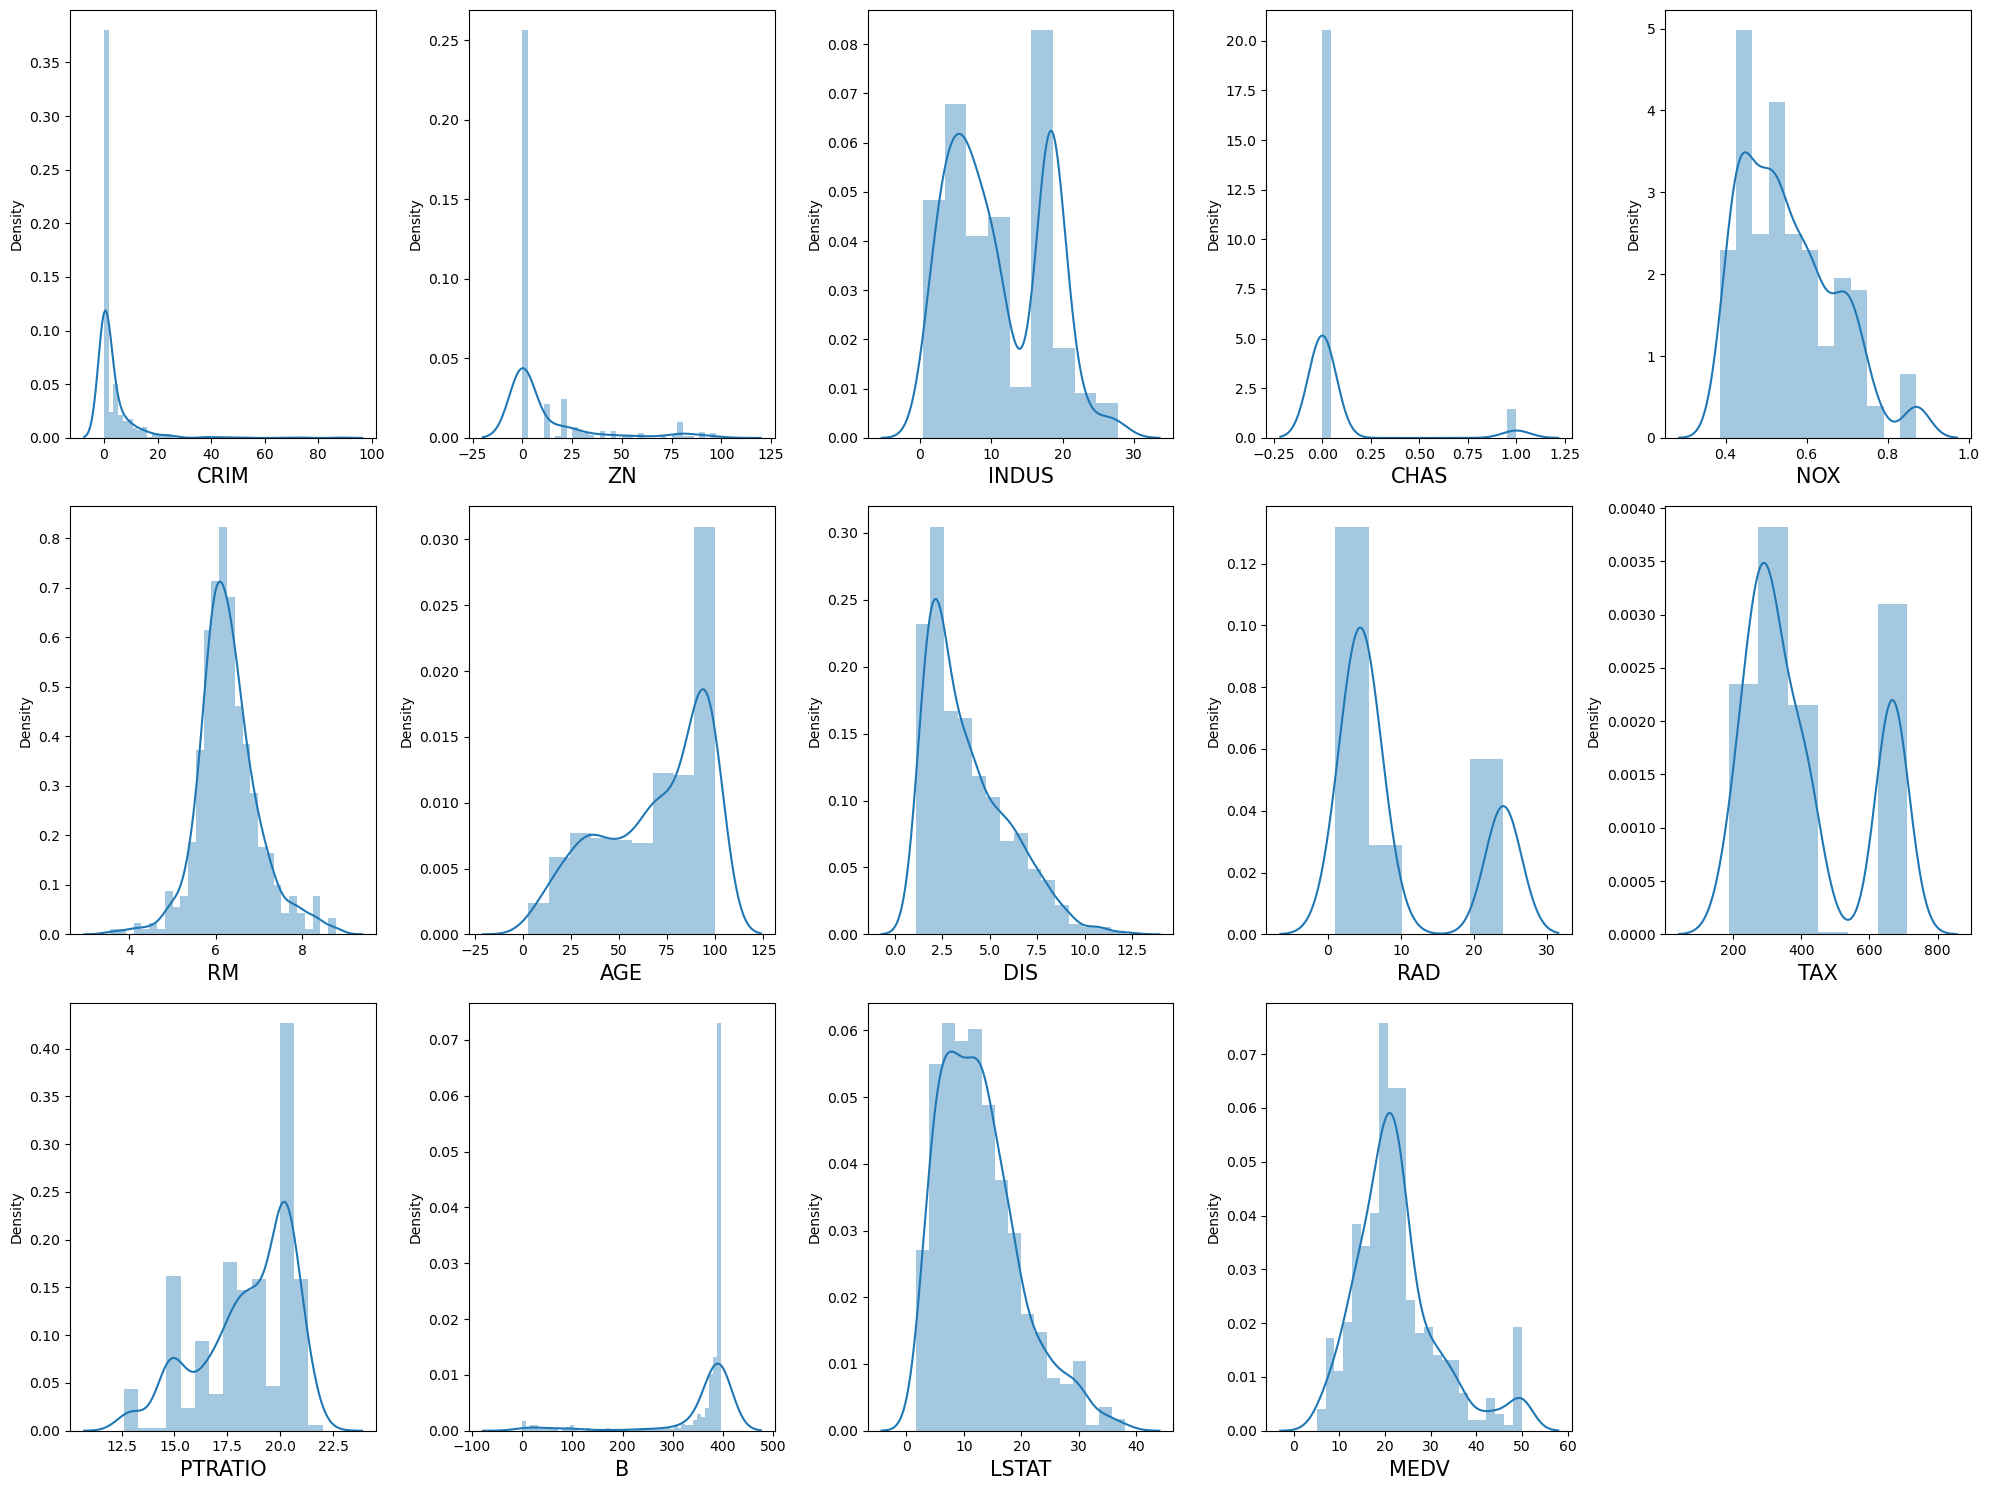

In [30]:
# plt.figure(figsize=(30, 15))
plt.figure(figsize=(20, 15))


plotnumber = 1

for column in df:
    # if plotnumber <= 14:
    ax = plt.subplot(3, 5, plotnumber)
    sns.distplot(df[column])
    plt.xlabel(column, fontsize=15)

    plotnumber += 1

plt.tight_layout()
plt.show()

<Axes: >

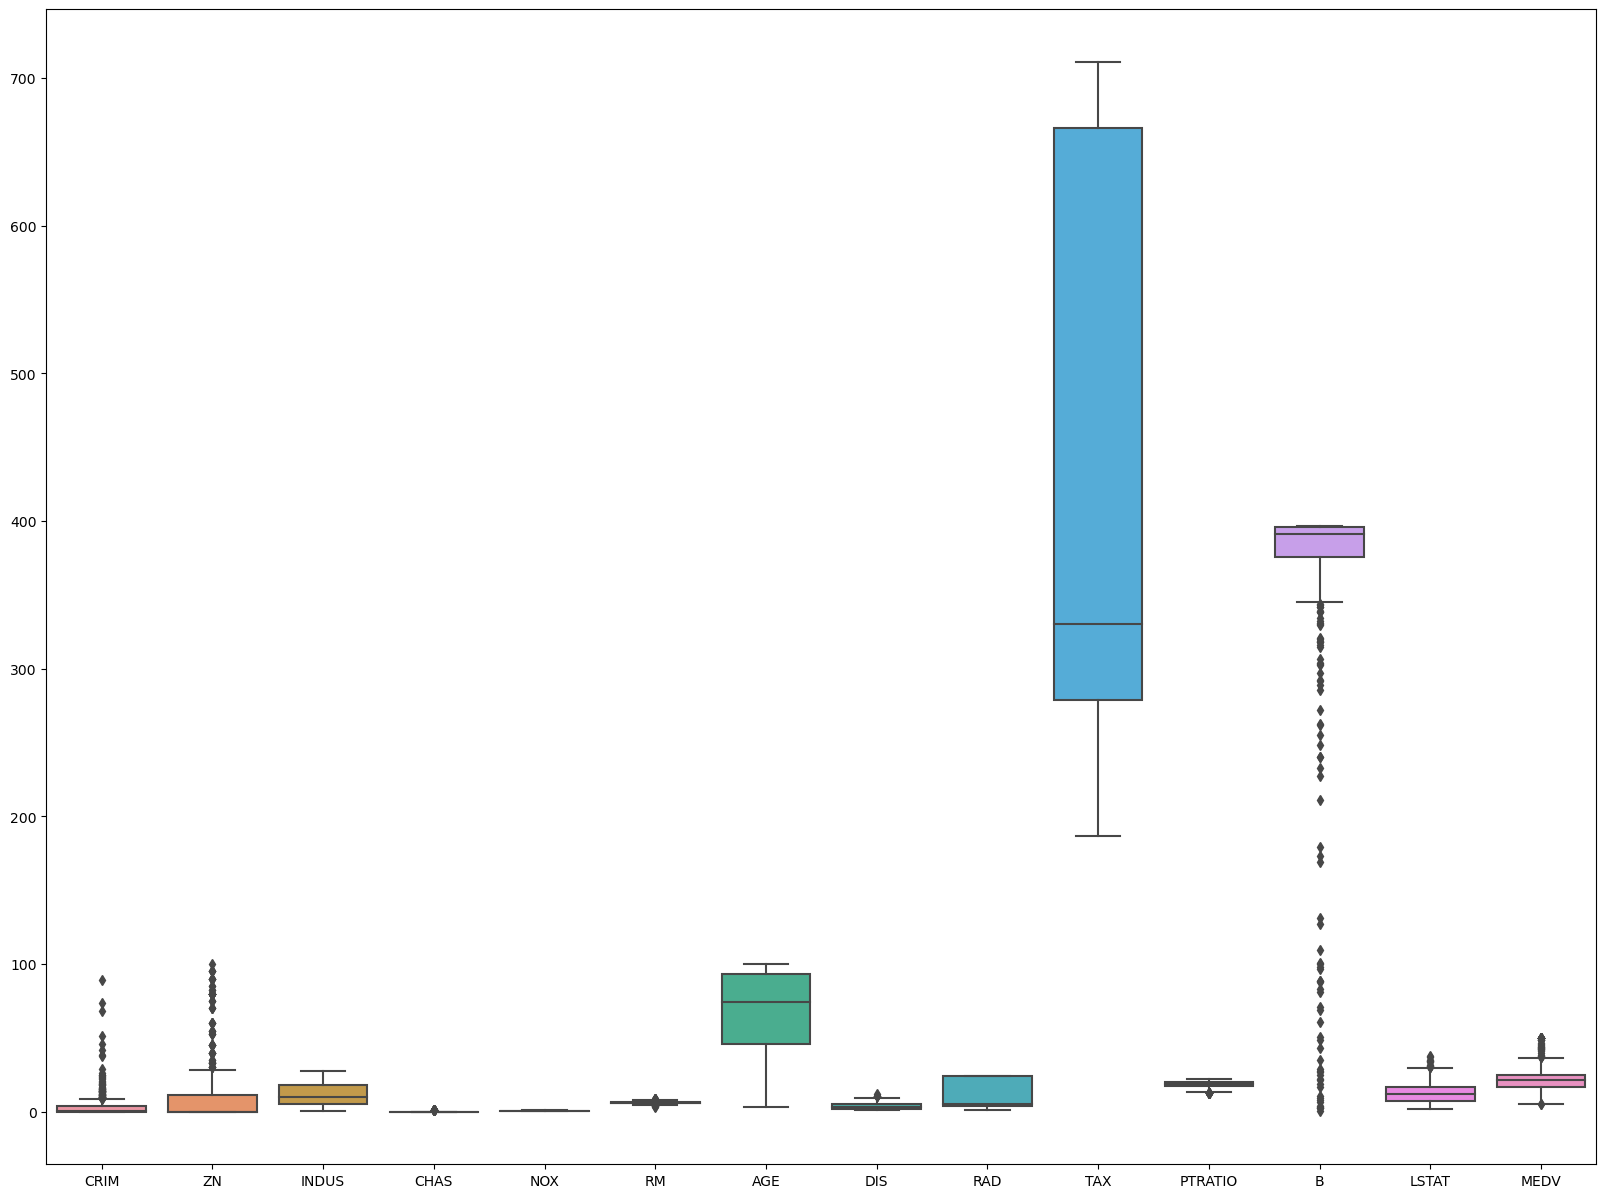

In [31]:
plt.figure(figsize=(20, 15))
sns.boxplot(df)

In [32]:
# Remove outliers in CRIM, ZN and B feature with zscore -3 & 3

df2 = df[
    (df["CRIM"] > df["CRIM"].mean() - 3 * df["CRIM"].std())
    & (df["CRIM"] < df["CRIM"].mean() + 3 * df["CRIM"].std())
]
df2 = df[
    (df["ZN"] > df["ZN"].mean() - 3 * df["ZN"].std())
    & (df["ZN"] < df["ZN"].mean() + 3 * df["ZN"].std())
]
df2 = df[
    (df["B"] > df["B"].mean() - 3 * df["B"].std())
    & (df["B"] < df["B"].mean() + 3 * df["B"].std())
]

In [33]:
df.shape

(506, 14)

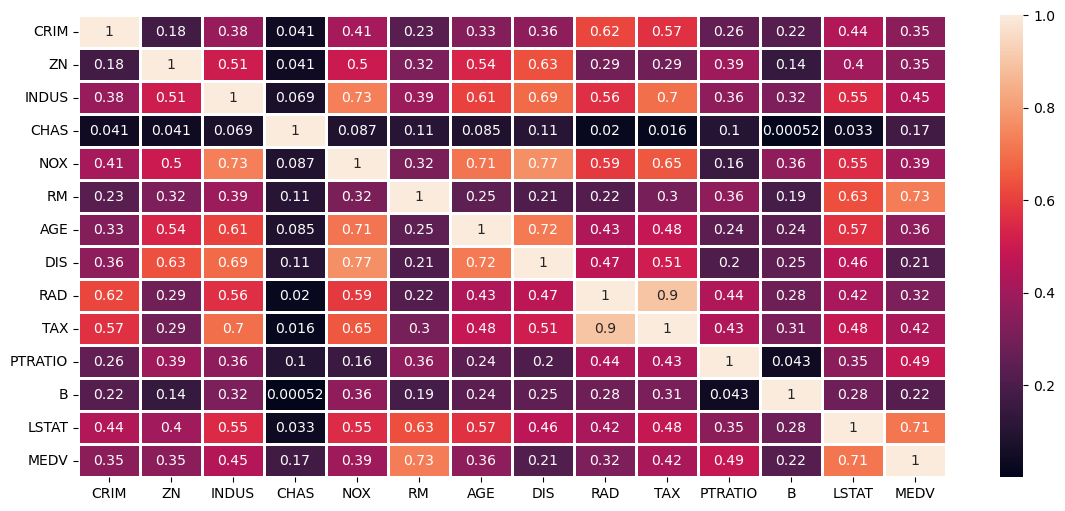

In [34]:
plt.figure(figsize=(14, 6))
corr = abs(df2.corr())
sns.heatmap(
    corr,
    annot=True,
    linewidth=1,
)
plt.show()

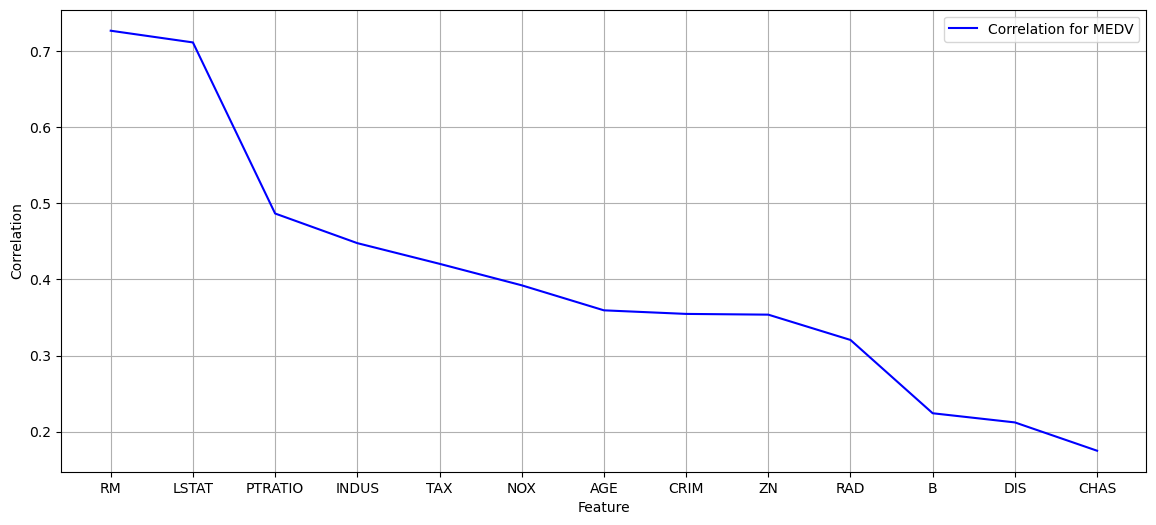

In [35]:
# Plot to check correlations of features vs MDEV

plt.figure(figsize=(14, 6))
plt.plot(
    corr["MEDV"].sort_values(ascending=False)[1:],
    label="Correlation for MEDV",
    color="blue",
)
plt.ylabel("Correlation")
plt.xlabel("Feature")
plt.grid(True)
plt.legend()
plt.show()

In [36]:
df.CHAS.value_counts()

CHAS
0.0    472
1.0     34
Name: count, dtype: int64

<Axes: xlabel='MEDV', ylabel='Count'>

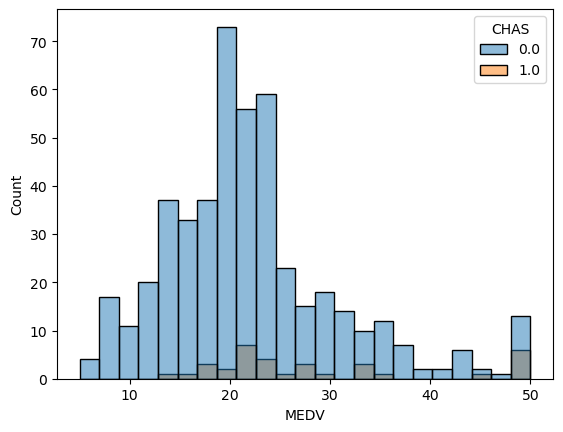

In [37]:
sns.histplot(hue="CHAS", x="MEDV", data=df)

In [54]:
X = df.drop(columns=["MEDV"])
y = df["MEDV"]

In [57]:
# scalling the data
from sklearn.preprocessing import StandardScaler

sc= StandardScaler()

X = sc.fit_transform(X)


### Train Test Split


In [72]:
from sklearn.model_selection import train_test_split



X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=80, shuffle=True
)

In [73]:
print("Shape X_train: ", X_train.shape)
print("Shape X_test: ", X_test.shape)
print("Shape y_train: ", y_train.shape)
print("Shape y_test: ", y_test.shape)

Shape X_train:  (404, 13)
Shape X_test:  (102, 13)
Shape y_train:  (404,)
Shape y_test:  (102,)


In [74]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.7610592533580116

In [75]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.1, solver='cholesky')
ridge_reg.fit(X_train, y_train)
ridge_reg.score(X_test, y_test)

0.7610817921185684

In [76]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso.score(X_test, y_test)

0.7548104199194781